Forme de X : (8712, 1000, 1) Forme de y : (8712, 5, 1)
Ensemble d'entraînement : (6098, 1000, 1) (6098, 5, 1)
Ensemble de validation  : (1306, 1000, 1) (1306, 5, 1)
Ensemble de test        : (1308, 1000, 1) (1308, 5, 1)


Model: "Hybrid_TCN_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 1000, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 1000, 50)       │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ TCN_SimpleBlock (Functional)    │ (None, 1000, 32)       │         9,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        16,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,823 (143.84 KB)

 Trainable params: 36,823 (143.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 93s 240ms/step - loss: 0.0010 - val_loss: 2.4255e-04 - learning_rate: 5.0000e-04
Epoch 2/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 90s 235ms/step - loss: 3.6616e-05 - val_loss: 4.1484e-04 - learning_rate: 5.0000e-04
Epoch 3/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 90s 235ms/step - loss: 2.7010e-05 - val_loss: 4.0578e-04 - learning_rate: 5.0000e-04
Epoch 4/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 90s 236ms/step - loss: 2.7156e-05 - val_loss: 1.2071e-04 - learning_rate: 5.0000e-04
Epoch 5/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 90s 237ms/step - loss: 3.4770e-05 - val_loss: 2.2869e-04 - learning_rate: 5.0000e-04
Epoch 6/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 89s 233ms/step - loss: 2.3032e-05 - val_loss: 5.1360e-04 - learning_rate: 5.0000e-04
Epoch 7/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 90s 236ms/step - loss: 2.1417e-05 - val_loss: 1.4859e-04 - learning_rate: 5.0000e-04
Epoch 8/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 89s 234ms/step - loss: 2.1879e-05 - val_loss: 2.2374e-04 - learning_rate: 5.0000e

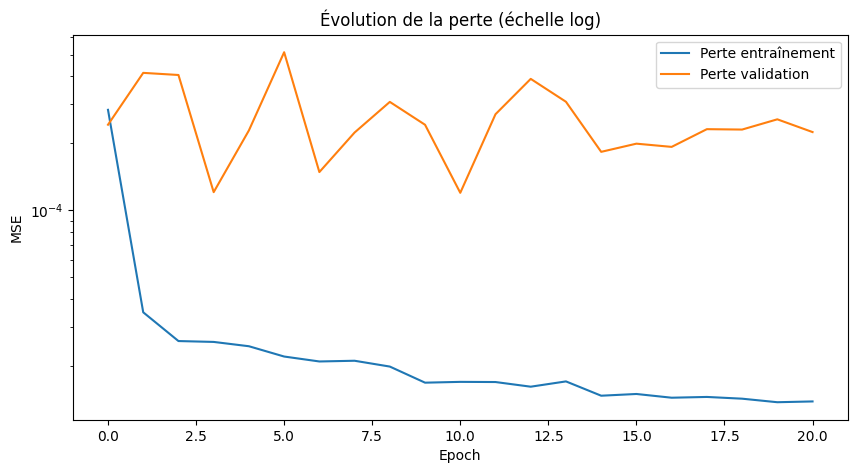

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0042
Test Loss : 0.008658967912197113
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step
----- Performance par jour de prévision -----
Jour 1: R² = 0.6917, MAE = 1471.6719, MAPE = 11.06%, Accuracy (tol 5%) = 9.40%
Jour 2: R² = 0.7965, MAE = 1179.2884, MAPE = 8.84%, Accuracy (tol 5%) = 19.50%
Jour 3: R² = 0.5678, MAE = 1764.8828, MAPE = 13.37%, Accuracy (tol 5%) = 3.44%
Jour 4: R² = 0.5533, MAE = 1791.9517, MAPE = 13.56%, Accuracy (tol 5%) = 3.98%
Jour 5: R² = 0.8331, MAE = 1064.4684, MAPE = 8.07%, Accuracy (tol 5%) = 23.17%


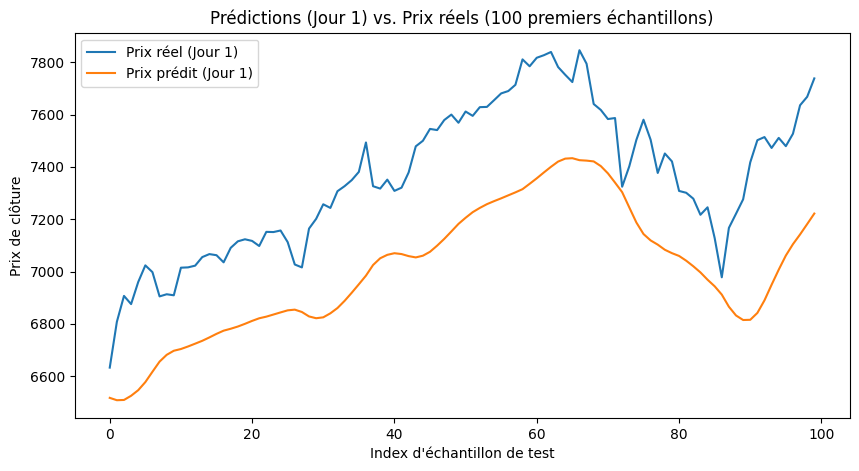

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras import layers, models, Input, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tcn import TCN

##############################################
# Fonctions de calcul des métriques personnalisées
##############################################
def calculate_accuracy(y_true, y_pred, tolerance=0.05):
    """
    Calcule l'accuracy pour un modèle de régression : 
    pourcentage de prédictions dont l'erreur relative est <= tolerance.
    """
    epsilon = tf.keras.backend.epsilon()
    error = np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon))
    correct_predictions = np.sum(error <= tolerance)
    accuracy = correct_predictions / y_true.size * 100
    return accuracy

def get_performance_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    accuracy = calculate_accuracy(y_true, y_pred, tolerance=0.05)
    return rmse, mae, r2, accuracy, mape

##############################################
# 1) Création des séquences pour prévision multi-jours
##############################################
def create_sequences(values, sequence_length=60, forecast_horizon=5):
    """
    Crée des séquences glissantes.
    
    Args:
        values: tableau 2D de forme (nombre_samples, nombre_caractéristiques)
        sequence_length: nombre de pas d'entrée (ex: 60 jours)
        forecast_horizon: nombre de pas à prédire (ex: 5 jours)
        
    Returns:
        X: de forme (nombre_samples - sequence_length - forecast_horizon + 1, sequence_length, nombre_caractéristiques)
        y: de forme (nombre_samples - sequence_length - forecast_horizon + 1, forecast_horizon, 1)
    """
    X, y = [], []
    for i in range(sequence_length, len(values) - forecast_horizon + 1):
        X_window = values[i - sequence_length : i]
        y_window = values[i : i + forecast_horizon]
        X.append(X_window)
        y.append(y_window)
    X = np.array(X)
    y = np.array(y)
    if y.ndim == 2:
        y = y.reshape(-1, forecast_horizon, 1)
    return X, y

##############################################
# 2) Modèle hybride TCN + LSTM pour prévision multi-jours
##############################################
def TCN_SimpleBlock(input_shape, num_filters=32, kernel_size=3, dropout_rate=0.2):
    """
    Un bloc TCN simplifié composé de 2 convolutions causales, avec dropout et connexion résiduelle.
    """
    inputs = tf.keras.Input(shape=input_shape)
    
    x = layers.Conv1D(
        filters=num_filters,
        kernel_size=kernel_size,
        padding='causal',
        activation='relu'
    )(inputs)
    x = layers.Dropout(dropout_rate)(x)
    
    x = layers.Conv1D(
        filters=num_filters,
        kernel_size=kernel_size,
        padding='causal',
        activation='relu'
    )(x)
    x = layers.Dropout(dropout_rate)(x)
    
    # Connexion résiduelle
    if inputs.shape[-1] != x.shape[-1]:
        inputs_res = layers.Conv1D(num_filters, kernel_size=1, padding='same')(inputs)
    else:
        inputs_res = inputs
    
    x = layers.Add()([inputs_res, x])
    x = layers.Activation('relu')(x)
    
    model = Model(inputs, x, name="TCN_SimpleBlock")
    return model

def build_hybrid_model(input_shape, forecast_horizon=5, tcn_filters=32, lstm_units=50, dropout_rate=0.2, learning_rate=0.0005):
    """
    Modèle hybride combinant :
      - Une première couche LSTM (return_sequences=True)
      - Un bloc TCN simple appliqué sur la sortie de la LSTM
      - Une seconde couche LSTM pour résumer la séquence
      - Une couche Dense finale avec forecast_horizon unités pour la prévision multi-jours
    """
    inputs = Input(shape=input_shape)
    
    lstm_in = layers.LSTM(lstm_units, return_sequences=True)(inputs)
    
    # Note : la forme d'entrée du bloc TCN est celle de la sortie de la première LSTM.
    tcn_out = TCN_SimpleBlock(input_shape=(lstm_in.shape[1], lstm_in.shape[2]),
                              num_filters=tcn_filters,
                              kernel_size=3,
                              dropout_rate=dropout_rate)(lstm_in)
    
    lstm_out = layers.LSTM(lstm_units)(tcn_out)
    
    outputs = layers.Dense(forecast_horizon, activation='linear')(lstm_out)
    
    model = Model(inputs, outputs, name="Hybrid_TCN_LSTM_Model")
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

##############################################
# 3) Workflow principal
##############################################
def main():
    # (A) Charger le CSV et extraire la colonne 'close'
    df = pd.read_csv("/Users/welto/Library/CloudStorage/OneDrive-CentraleSupelec/3A/DL/Project/NASDAQ_100.csv")
    close_prices = df['close'].values.reshape(-1, 1)
    
    # (B) Mise à l'échelle avec MinMaxScaler
    scaler = MinMaxScaler()
    scaled_prices = scaler.fit_transform(close_prices)
    
    # (C) Création des séquences : 1000 jours d'entrée pour prédire les 5 jours suivants
    sequence_length = 1000
    forecast_horizon = 5
    X, y = create_sequences(scaled_prices, sequence_length=sequence_length, forecast_horizon=forecast_horizon)
    print("Forme de X :", X.shape, "Forme de y :", y.shape)
    
    # (D) Découpage en ensembles Train (70%), Validation (15%) et Test (15%)
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)
    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
    X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]
    print("Ensemble d'entraînement :", X_train.shape, y_train.shape)
    print("Ensemble de validation  :", X_val.shape, y_val.shape)
    print("Ensemble de test        :", X_test.shape, y_test.shape)
    
    # (E) Construction du modèle hybride TCN+LSTM
    model = build_hybrid_model(
        input_shape=(sequence_length, 1),
        forecast_horizon=forecast_horizon,
        tcn_filters=32,
        lstm_units=50,
        dropout_rate=0.2,
        learning_rate=0.0005
    )
    model.summary()
    
    # (F) Entraînement du modèle
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=16,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr]
    )
    
    # Tracer l'évolution de la perte en échelle logarithmique
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Perte entraînement')
    plt.plot(history.history['val_loss'], label='Perte validation')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.yscale("log")
    plt.title("Évolution de la perte (échelle log)")
    plt.legend()
    plt.show()
    
    # (G) Évaluation et prédiction sur l'ensemble de test
    test_loss = model.evaluate(X_test, y_test)
    print("Test Loss :", test_loss)
    y_pred_scaled = model.predict(X_test)  # forme : (nombre_samples_test, forecast_horizon)
    
    # Inversion de l'échelle : y_test et y_pred sont de forme (N, forecast_horizon, 1)
    # On les reforme en (N, forecast_horizon) pour pouvoir appliquer inverse_transform
    y_test_2d = y_test.reshape(y_test.shape[0], y_test.shape[1])
    y_pred_2d = y_pred_scaled.reshape(y_pred_scaled.shape[0], y_pred_scaled.shape[1])
    
    y_test_unscaled = scaler.inverse_transform(y_test_2d)
    y_pred_unscaled = scaler.inverse_transform(y_pred_2d)
    
    # (H) Calcul des métriques pour chaque jour prédit
    print("----- Performance par jour de prévision -----")
    for day in range(forecast_horizon):
        r2 = r2_score(y_test_unscaled[:, day], y_pred_unscaled[:, day])
        mae = mean_absolute_error(y_test_unscaled[:, day], y_pred_unscaled[:, day])
        mape = mean_absolute_percentage_error(y_test_unscaled[:, day], y_pred_unscaled[:, day]) * 100
        acc = calculate_accuracy(y_test_unscaled[:, day], y_pred_unscaled[:, day], tolerance=0.05)
        print(f"Jour {day+1}: R² = {r2:.4f}, MAE = {mae:.4f}, MAPE = {mape:.2f}%, Accuracy (tol 5%) = {acc:.2f}%")
    
    # (I) Tracé des prédictions vs. valeurs réelles pour le premier jour prédit
    n_plot = 100
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_unscaled[:n_plot, 0], label='Prix réel (Jour 1)')
    plt.plot(y_pred_unscaled[:n_plot, 0], label='Prix prédit (Jour 1)')
    plt.xlabel("Index d'échantillon de test")
    plt.ylabel("Prix de clôture")
    plt.title("Prédictions (Jour 1) vs. Prix réels (100 premiers échantillons)")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
